## HT4 - Proyecto 2. Entrega 2
### Árboles de Decisión
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import regresion


#### Árboles de Regresión

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

print(house_prices.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [40]:
X = regresion.trans_categorical(house_prices).dropna()
house_prices.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
from sklearn.model_selection import train_test_split

# Separar la variable objetivo (SalePrice)
y = np.log(X.pop("SalePrice"))

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

# Verificar tamaños de los conjuntos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(770, 57)
(330, 57)
(770,)
(330,)


In [42]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler() 

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('scaler', numerical_preprocessor, numerical_columns) 
])


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__max_depth": np.arange(2, 10, 1)} # sobre qué numero de max-depth vamos a iterar
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeRegressor())]) # probamos múltiples modelos con el preprocessor previo
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]

modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=2,scoring="neg_root_mean_squared_error") # evaluamos usando CV para ver cuál es el mejor modelo de todos 
modelo1.fit(X_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 4}

In [56]:
modelo1_pred = modelo1.predict(X_test)
modelo1_pred


array([11.67508511, 12.58686156, 11.67508511, 12.11497309, 11.89276474,
       11.89276474, 11.89276474, 12.88199193, 11.67508511, 12.58686156,
       11.67508511, 11.67508511, 12.0796791 , 11.29452192, 12.58686156,
       12.38428491, 12.0796791 , 12.0796791 , 11.60877045, 12.35277539,
       12.11497309, 12.58686156, 11.88144955, 12.0796791 , 12.0796791 ,
       11.29452192, 11.89276474, 12.58686156, 12.0796791 , 11.88144955,
       11.89276474, 12.38428491, 11.67508511, 12.35277539, 11.29452192,
       12.35277539, 11.89276474, 12.88199193, 12.11497309, 11.29452192,
       11.67508511, 12.88199193, 11.88144955, 12.58686156, 11.67508511,
       12.55473531, 11.67508511, 11.67508511, 11.89276474, 12.58686156,
       12.11497309, 11.67508511, 12.58686156, 12.11497309, 12.11497309,
       12.35277539, 12.58686156, 11.88144955, 11.67508511, 11.89276474,
       11.64684873, 12.11497309, 12.35277539, 12.0796791 , 11.89276474,
       11.59125478, 12.0796791 , 12.58686156, 11.67508511, 11.89

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, modelo1_pred)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test, modelo1_pred)
print(f"MSE: {mse:.4f}")

MAE: 0.1532
MSE: 0.0457


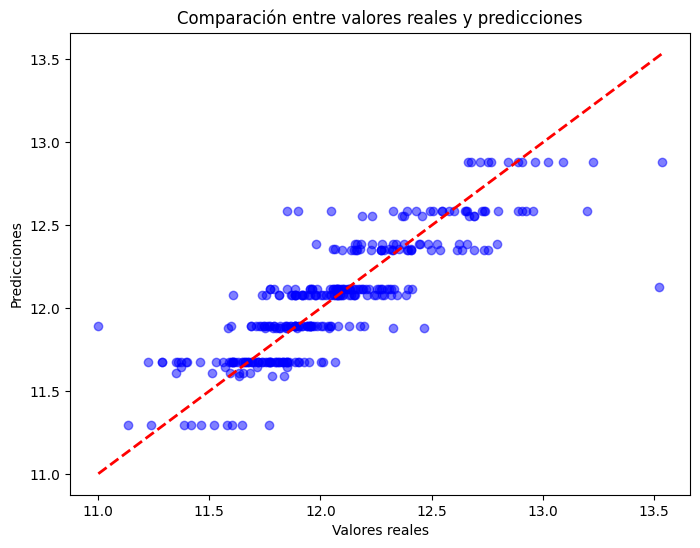

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title("Comparación entre valores reales y predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.show()

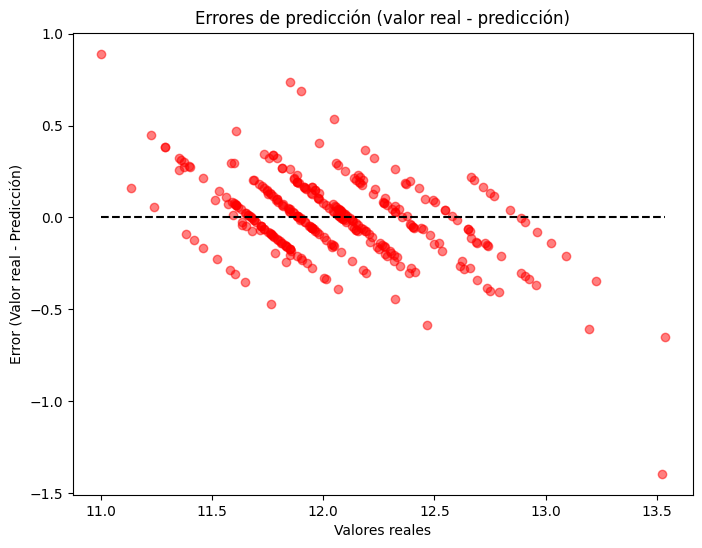

In [48]:
errores = modelo1_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='red', alpha=0.5)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
plt.title("Errores de predicción (valor real - predicción)")
plt.xlabel("Valores reales")
plt.ylabel("Error (Valor real - Predicción)")
plt.show()

In [57]:
param_grids = [
    {"regressor__max_depth": np.arange(10, 21, 1)},  # Segundo modelo: max_depth de 10 a 20
    {"regressor__max_depth": np.arange(1, 6, 1)},    # Tercer modelo: max_depth de 1 a 5
    {"regressor__max_depth": np.arange(5, 16, 1)}    # Cuarto modelo: max_depth de 5 a 15
]

In [58]:
modelos_resultados = []

# Realizar GridSearchCV con los diferentes rangos de max_depth
for param_grid in param_grids:
    modelo = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=2, scoring="neg_root_mean_squared_error")
    modelo.fit(X_train, y_train)
    modelos_resultados.append(modelo)
    print(f"Mejores parámetros para rango {param_grid['regressor__max_depth'][0]}-{param_grid['regressor__max_depth'][-1]}: {modelo.best_params_}")

Mejores parámetros para rango 10-20: {'regressor__max_depth': 13}
Mejores parámetros para rango 1-5: {'regressor__max_depth': 4}
Mejores parámetros para rango 5-15: {'regressor__max_depth': 7}


Modelo 1 - Parámetros:
{'regressor__max_depth': 13}
Modelo 1 - MAE: 0.1488
Modelo 1 - MSE: 0.0415


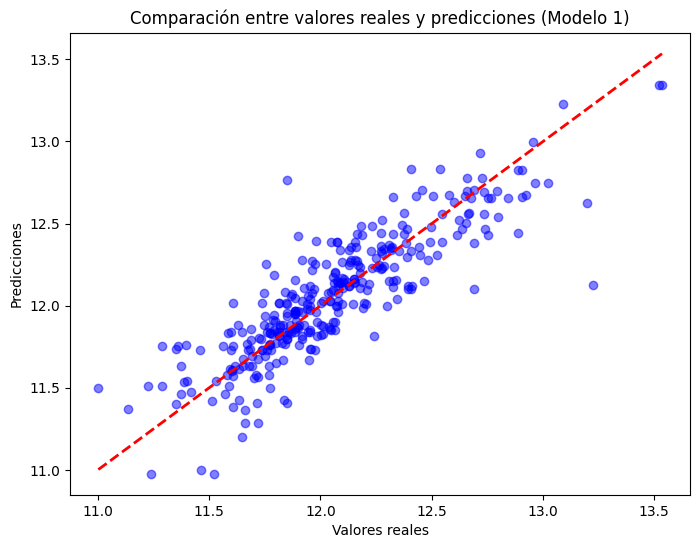

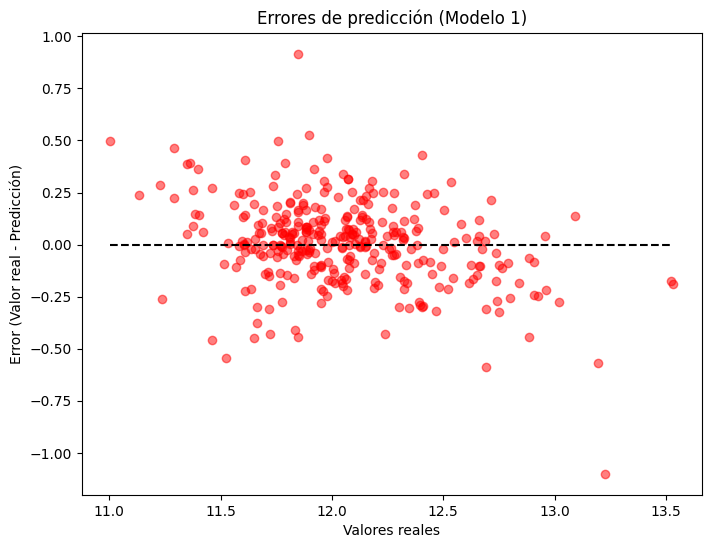

Modelo 2 - Parámetros:
{'regressor__max_depth': 4}
Modelo 2 - MAE: 0.1520
Modelo 2 - MSE: 0.0418


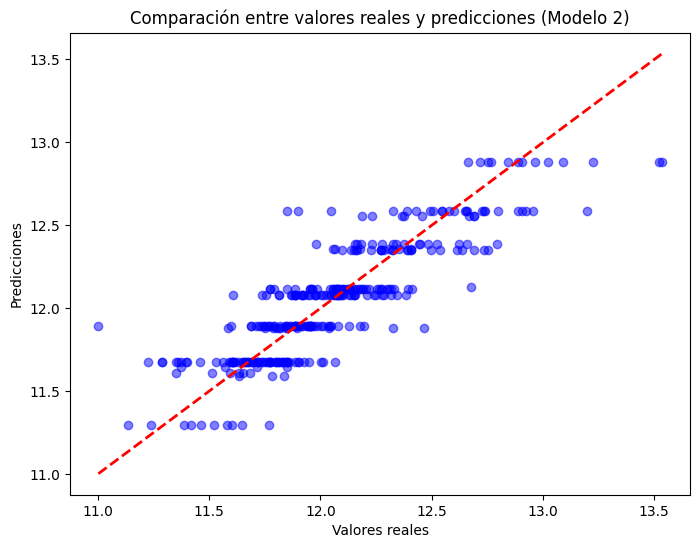

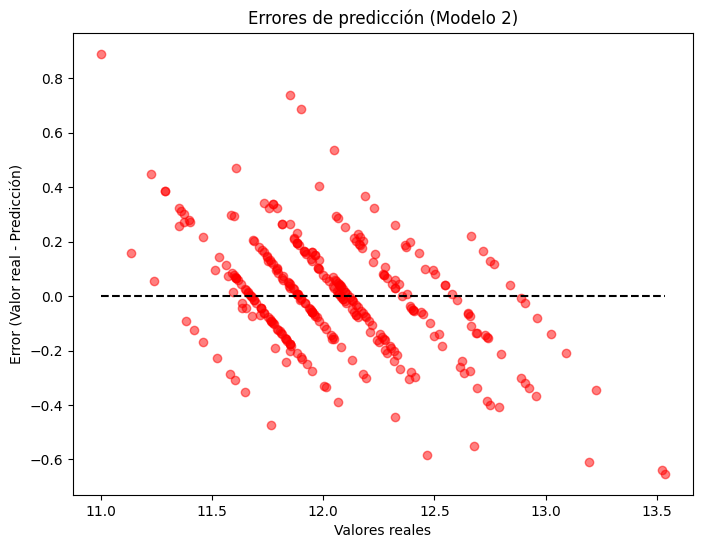

Modelo 3 - Parámetros:
{'regressor__max_depth': 7}
Modelo 3 - MAE: 0.1365
Modelo 3 - MSE: 0.0384


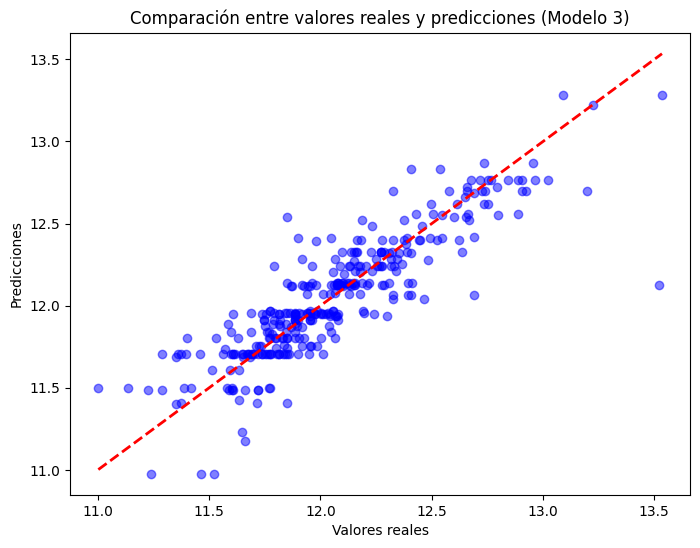

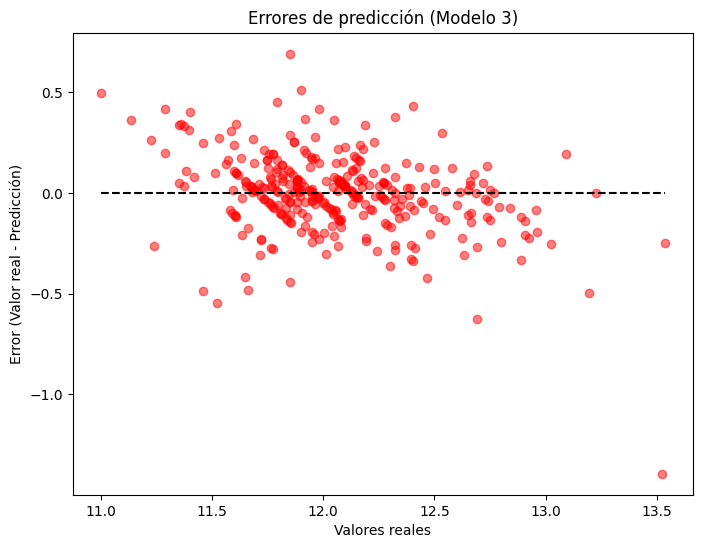

In [60]:
for i, modelo in enumerate(modelos_resultados):
    print(f"Modelo {i+1} - Parámetros:")
    print(modelo.best_params_)
    
    # Predicciones para el modelo i
    modelo1_pred = modelo.predict(X_test)
    
    # Calcular MAE y MSE
    mae = mean_absolute_error(y_test, modelo1_pred)
    print(f"Modelo {i+1} - MAE: {mae:.4f}")

    mse = mean_squared_error(y_test, modelo1_pred)
    print(f"Modelo {i+1} - MSE: {mse:.4f}")

    # Comparación entre valores reales y predicciones
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, modelo1_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
    plt.title(f"Comparación entre valores reales y predicciones (Modelo {i+1})")
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.show()

    # Errores de predicción (valor real - predicción)
    errores = modelo1_pred - y_test
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, errores, color='red', alpha=0.5)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='black', linestyles='dashed')
    plt.title(f"Errores de predicción (Modelo {i+1})")
    plt.xlabel("Valores reales")
    plt.ylabel("Error (Valor real - Predicción)")
    plt.show()

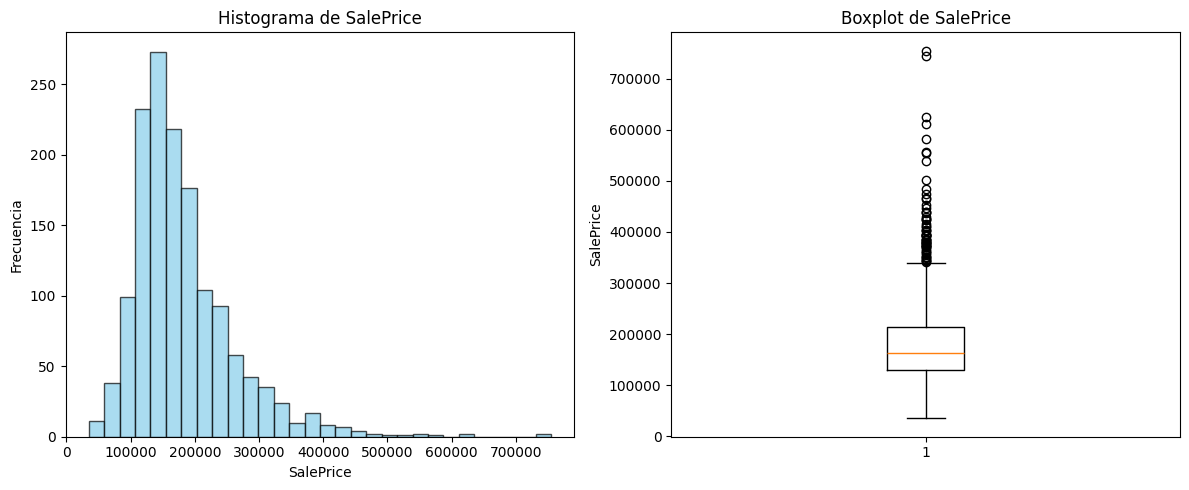